### Get a Subsection of the Music File

In [33]:
import numpy as np
import wave

# Get a WaveFile Object
wf = wave.open("../assets/music/Megalovania.wav", 'rb')

# Find a place with good audio
wf.setpos(9600)

# Set the data chunk size
chunk = 400

# Find the audio frames from both channels
tones = np.frombuffer(wf.readframes(chunk), dtype=np.int16).astype(float)

# Separate the audio into the two channels
channel_0 = tones[::2]
channel_1 = tones[1::2]

### Create a DataFrame for the Data

In [34]:
import pandas as pd

# Obtain the sample times of each tone
sample_times = np.linspace(0, chunk-1, chunk)

# Create a DataFrame containing the sample times and channels
data = pd.DataFrame({"Time": sample_times, "Channel 0": channel_0, "Channel 1": channel_1})

### Create a Plot of Each Channel

[]

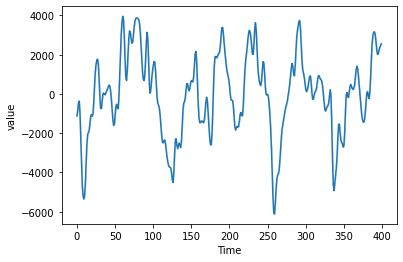

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.lineplot(x="Time", y="value", data=data.melt(["Time"]))
plt.plot()

### Interpret the Frequencies of the Sound Using a Wavelet Transform

In [76]:
import pywt

cA, cD = pywt.dwt(data["Channel 0"], wavelet='sym5')

### Reconstruct the Sound and Stretch it

In [110]:
reconstructed_sample_times = np.linspace(0, chunk-1, chunk)

reconstructed_sound = pywt.idwt(cA/2, cD, wavelet='sym5')

reconstructed_data = pd.DataFrame({"Time": reconstructed_sample_times, "Sound": reconstructed_sound})

### Create a Plot of the Reconstructed Sound

[]

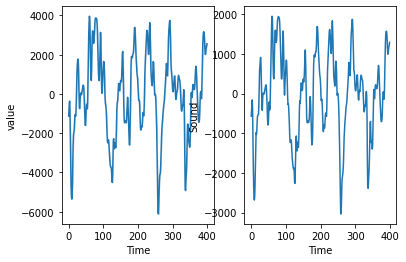

In [112]:
fig, axs = plt.subplots(ncols=2)
sb.lineplot(x="Time", y="value", data=data.melt(["Time"]), ax=axs[0])
sb.lineplot(x='Time', y='Sound', data=reconstructed_data, ax=axs[1])
plt.plot()